## Problem Statement: Using the UCI Retail Dataset, we will perform customer segmentation to identify customers which we need to show TLC (Tender Loving Care) as well as those we can improve the customer spend

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# set display options
pd.options.display.min_rows=50
pd.options.display.max_columns = 15
pd.options.display.precision = 3

In [3]:
# create a variable for the file to be read
file = "UCI online_retail_II.xlsx"

In [4]:
# read in the excel file
data = pd.read_excel(file, sheet_name = "Year 2010-2011")

In [5]:
# what's the size of the dataset (no. of rows, no. of columns)
data.shape

(541910, 8)

In [6]:
# have a peek of the first 5 rows of the dataset
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# are there any missing values?
data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [8]:
# what's the percentage of missing values compared to the total?
data.isnull().sum() / len(data)

Invoice        0.000
StockCode      0.000
Description    0.003
Quantity       0.000
InvoiceDate    0.000
Price          0.000
Customer ID    0.249
Country        0.000
dtype: float64

#### As noted above, there are 2 columns (Description and Customer ID) with missing values.  Is the missing values in Description column within the missing values in Customer ID?  Let's check this.

In [9]:
# create a variable to store the missing values in the Description column and then verify if the total missing values is that of the length of the variable 
des_null = data.loc[data['Description'].isnull()]
print(des_null['Customer ID'].isnull().sum())
print(len(des_null))

1454
1454


#### Since the missing values in the Description column are within that of the missing values in the Customer ID column, we can remove them.  Nevertheless, in order to fulfill the analysis of the problem statement, we need Customer ID values to be available.  Thus, we will drop all missing values in the Customer ID column

In [10]:
# drop missing values in Customer ID column
data.dropna(subset=['Customer ID'], axis=0, inplace=True)

In [11]:
# re-looking at the missing values of the dataset.  Fingers crossed...we should not see any:)
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# let's check if the data types are appropriate
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [13]:
# prefer to see Customer ID as an integer rather than float.  Let's change this.
data['Customer ID'] = data['Customer ID'].astype(np.int64)

In [14]:
# rename Customer ID to CustomerID to simplify data input
data.rename(columns = {'Customer ID':"CustomerID"}, inplace=True)

In [15]:
# let's check the data types after the updates in Customer ID column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   CustomerID   406830 non-null  int64         
 7   Country      406830 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [16]:
# randomly look at 5 rows in the dataset
data.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
248488,558860,22755,SMALL PURPLE BABUSHKA NOTEBOOK,3,2011-07-04 12:18:00,0.85,17975,United Kingdom
354061,567858,22413,METAL SIGN TAKE IT OR LEAVE IT,1,2011-09-22 13:50:00,2.95,16813,United Kingdom
117899,546411,22570,FELTCRAFT CUSHION RABBIT,144,2011-03-11 16:43:00,3.39,12939,United Kingdom
401446,571441,21470,FLOWER VINE RAFFIA FOOD COVER,1,2011-10-17 13:31:00,7.46,14096,United Kingdom
269454,560451,21873,IF YOU CAN'T STAND THE HEAT MUG,12,2011-07-19 09:50:00,1.25,14911,EIRE


In [17]:
# change the Invoice Date format to show only date and not the time
data['InvoiceDate'] = data["InvoiceDate"].dt.date

In [18]:
# randomly look at 5 rows in the dataset again after the update
data.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
212648,555500,22101,MIRROR MOSAIC VOTIVE HOLDER,1,2011-06-03,2.10,15508,United Kingdom
395826,571046,23295,SET OF 12 MINI LOAF BAKING CASES,3,2011-10-13,0.83,18096,United Kingdom
294308,562711,22382,LUNCH BAG SPACEBOY DESIGN,1,2011-08-08,1.65,16788,United Kingdom
306732,563840,22906,12 MESSAGE CARDS WITH ENVELOPES,2,2011-08-19,1.65,14712,United Kingdom
305173,563638,16225,RATTLE SNAKE EGGS,2,2011-08-18,1.25,15311,United Kingdom


In [19]:
# check is there is any duplicate values
data.duplicated().sum()

5226

In [20]:
# have a closer look at the duplicates
data.loc[data.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01,2.95,17920,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01,2.95,17920,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01,3.75,17920,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01,2.10,17920,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01,1.65,17920,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01,3.75,17920,United Kingdom


#### Scrutinizing the information above, the concerned rows do not seem to be duplicates as some columns information differ.  Thus, will not remove the supposedly duplicates and will continue with the analysis.  

# Perform Cohort Analysis

In [21]:
# make a copy of the dataset for cohort analysis
df = data.copy()
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680,France
541909,581587,POST,POSTAGE,1,2011-12-09,18.00,12680,France


In [22]:
# define a function to extract year and month in the rows
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01


In [23]:
# randomly select 10 rows for checking
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,CohortMonth
273000,560776,22714,CARD BIRTHDAY COWBOY,12,2011-07-21,0.42,13995,United Kingdom,2011-07-01,2011-04-01
399422,571280,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2011-10-16,8.50,18122,United Kingdom,2011-10-01,2011-07-01
359379,568187,23353,6 GIFT TAGS VINTAGE CHRISTMAS,48,2011-09-25,0.83,13408,United Kingdom,2011-09-01,2010-12-01
304222,563565,22467,GUMBALL COAT RACK,2,2011-08-17,2.55,17338,United Kingdom,2011-08-01,2010-12-01
86642,543587,21500,PINK POLKADOT WRAP,25,2011-02-10,0.42,12561,Germany,2011-02-01,2011-02-01
420781,572909,23241,TREASURE TIN GYMKHANA DESIGN,1,2011-10-26,2.08,15821,United Kingdom,2011-10-01,2011-10-01
422493,573093,23494,VINTAGE DOILY DELUXE SEWING KIT,1,2011-10-27,5.95,18283,United Kingdom,2011-10-01,2011-01-01
292075,562539,22348,TEA BAG PLATE RED RETROSPOT,11,2011-08-05,0.85,17220,United Kingdom,2011-08-01,2010-12-01
239093,557974,84997A,CHILDRENS CUTLERY POLKADOT GREEN,10,2011-06-24,4.15,14541,United Kingdom,2011-06-01,2011-01-01
235253,557632,23199,JUMBO BAG APPLES,10,2011-06-21,2.08,17420,United Kingdom,2011-06-01,2010-12-01


In [24]:
# define a function for date features extraction 
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [25]:
# assign time offset value
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


In [26]:
# count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_counts


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# calculate retention rate

# stores the first columns as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# review the retention table
retention.round(3) * 100


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


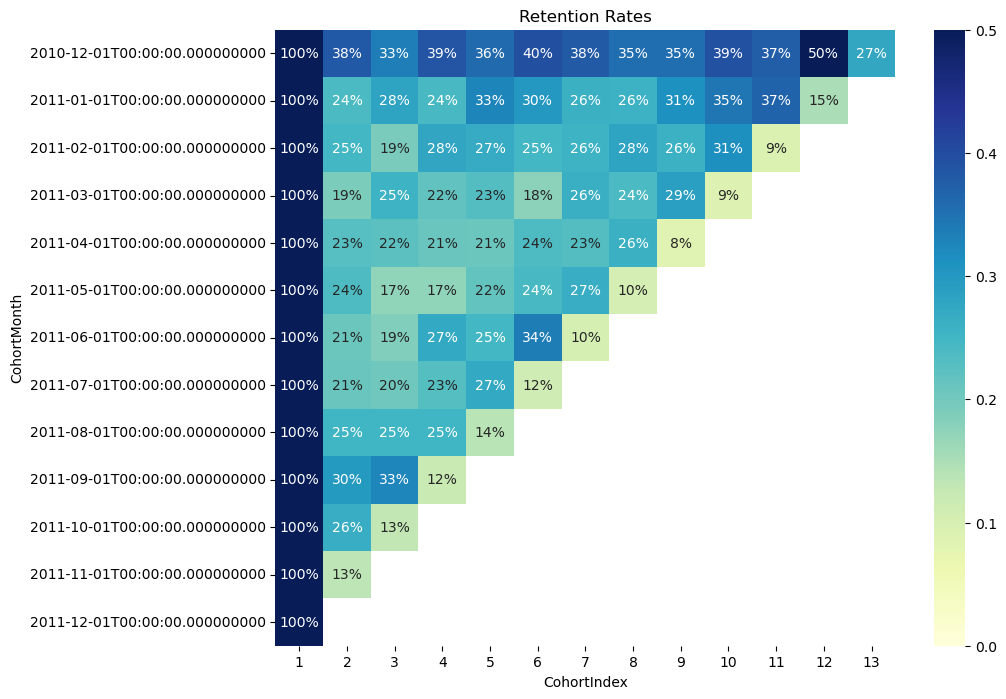

In [28]:
# build the heatmap
plt.figure(figsize=(10,8))
plt.title("Retention Rates")
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin= 0.0, vmax = 0.5, cmap = 'YlGnBu')
plt.show()


In [29]:
# cohort analysis by quantity
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# which are the 260 customers (as noted in the retention table above) that are still with us after 12 months?
good_cust = df[(df['CohortMonth'] == '2010-12-01') & (df['CohortIndex'] == 13)]
print(good_cust['CustomerID'].nunique())
print("\n")
print(good_cust['CustomerID'].unique().tolist())

260


[15197, 13468, 14299, 13078, 14527, 14911, 14525, 17044, 16570, 13267, 16839, 13854, 16293, 15544, 15563, 13115, 15101, 14146, 16145, 15021, 16700, 16701, 14243, 14388, 14189, 13777, 13408, 14047, 17937, 17381, 13890, 15380, 13199, 14282, 13090, 12989, 12748, 13599, 12963, 14298, 14051, 15862, 17450, 18077, 14309, 15028, 15602, 17293, 13969, 12971, 14135, 15373, 17675, 14440, 13089, 14766, 15290, 16011, 17920, 17576, 15694, 13102, 14702, 17841, 14083, 18097, 13495, 17949, 16013, 14688, 16353, 16899, 14092, 13798, 13705, 14085, 18144, 15547, 15311, 17611, 14594, 15856, 15769, 15271, 18055, 15570, 18245, 12668, 14560, 18109, 13458, 15078, 17567, 13953, 17238, 14865, 16954, 14031, 17243, 18065, 17629, 13838, 17618, 17858, 16033, 16931, 15867, 13319, 16905, 17954, 17827, 15358, 18223, 12782, 13126, 17402, 15628, 15392, 17526, 12841, 16873, 12913, 14060, 16746, 16904, 17857, 14777, 14401, 17511, 17706, 15854, 14696, 17090, 17218, 16684, 15159, 18044, 15640, 13305, 17676, 15984, 13173,

# Perform RFM Analysis

In [31]:
# have a quick look at our current dataframe
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


In [32]:
# create a new column for total sum (i.e. Quantity * Price)
df['TotalSum'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [33]:
# understand the datatype for TotalSum
df['TotalSum'].dtype

dtype('float64')

In [34]:
# understand the min date and max date of the dataset
print("Min: {}; Max: {}".format(min(df.InvoiceDate), max(df.InvoiceDate)))

Min: 2010-12-01; Max: 2011-12-09


In [35]:
# as noted above, the date range is not for a year.  Thus, drop those ihvoices from 2010-12-01 to 2010-12-09 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')
df1 = df.loc[(df['InvoiceDate'] > '2010-12-09')]
print("Min: {}; Max: {}".format(min(df1.InvoiceDate), max(df1.InvoiceDate)))

Min: 2010-12-10 00:00:00; Max: 2011-12-09 00:00:00


In [36]:
# check datatypes 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392027 entries, 22523 to 541909
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       392027 non-null  object        
 1   StockCode     392027 non-null  object        
 2   Description   392027 non-null  object        
 3   Quantity      392027 non-null  int64         
 4   InvoiceDate   392027 non-null  datetime64[ns]
 5   Price         392027 non-null  float64       
 6   CustomerID    392027 non-null  int64         
 7   Country       392027 non-null  object        
 8   InvoiceMonth  392027 non-null  datetime64[ns]
 9   CohortMonth   392027 non-null  datetime64[ns]
 10  CohortIndex   392027 non-null  int64         
 11  TotalSum      392027 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(3), object(4)
memory usage: 38.9+ MB


In [37]:
# check the 1st 5 rows 
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
22523,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10,1.25,15805,United Kingdom,2010-12-01,2010-12-01,1,15.0
22524,538172,79321,CHILLI LIGHTS,8,2010-12-10,4.95,15805,United Kingdom,2010-12-01,2010-12-01,1,39.6
22525,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10,2.55,15805,United Kingdom,2010-12-01,2010-12-01,1,30.6
22526,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10,2.95,15805,United Kingdom,2010-12-01,2010-12-01,1,35.4
22527,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10,0.55,15805,United Kingdom,2010-12-01,2010-12-01,1,13.2


In [38]:
# create a hypothetical date for the analysis
analysis_date = max(df1.InvoiceDate) + dt.timedelta(days=1)
analysis_date

Timestamp('2011-12-10 00:00:00')

In [39]:
# aggregate data on customer level and rename columns for ease of reference
data_set = df1.groupby(['CustomerID']).agg({
    'InvoiceDate' : lambda x: (analysis_date - x.max()).days,
    'Invoice' : 'count',
    'TotalSum' : 'sum'})

data_set.rename(columns = {'InvoiceDate' : 'Recency', 
                           'Invoice' : 'Frequency',
                           'TotalSum' : 'Monetary'}, inplace=True)

In [40]:
# setting recency labels
r_labels = range(4, 0, -1)
r_quantiles = pd.cut(data_set['Recency'], 4, labels = r_labels)
data_set = data_set.assign(R = r_quantiles.values)

In [41]:
# setting frequency labels
f_labels = range(1, 5)
f_quantiles = pd.cut(data_set['Frequency'], 4, labels = f_labels)
data_set = data_set.assign(F = f_quantiles.values)

In [42]:
# setting monetary labels
m_labels = range(1, 5)
m_quantiles = pd.cut(data_set['Monetary'], 4, labels = m_labels)
data_set = data_set.assign(M = m_quantiles.values)

In [43]:
# have a look at the RFM dataframe
data_set.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,3,151,3598.21,4,1,1
12348,76,31,1797.24,4,1,1
12349,19,73,1757.55,4,1,1
12350,311,17,334.40,1,1,1


In [44]:
# build RFM segment and RFM Score
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_set['RFM_Segment'] = data_set.apply(join_rfm, axis=1)
data_set['RFM_Score'] = data_set[['R','F','M']].sum(axis=1)

In [45]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      4296 non-null   int64   
 1   Frequency    4296 non-null   int64   
 2   Monetary     4296 non-null   float64 
 3   R            4296 non-null   category
 4   F            4296 non-null   category
 5   M            4296 non-null   category
 6   RFM_Segment  4296 non-null   object  
 7   RFM_Score    4296 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 214.3+ KB


In [46]:
# reveiw the RFM segment
data_set.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.01.01.0    2915
3.01.01.0     589
2.01.01.0     471
1.01.01.0     309
4.01.02.0       3
4.02.01.0       2
4.03.01.0       2
4.01.03.0       1
4.01.04.0       1
4.02.04.0       1
dtype: int64

In [47]:
# summary metrics per RFM score
data_set.groupby('RFM_Score').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                   'Monetary':['mean','count']}).round(1)

Recency Frequency  Monetary      
             mean      mean      mean count
RFM_Score                                  
3           314.3      21.1     309.8   309
4           227.9      26.0     515.8   471
5           134.9      42.7     735.9   589
6            31.8     107.7    2020.0  2915
7             8.2    1650.8   78094.4     5
8             5.0    3249.0   89884.3     3
9             1.7    4650.0  131857.9     3
10            2.0    2085.0  279489.0     1

In [48]:
# grouping into named segments
def segment_me(df):
    if df['RFM_Score'] >=9:
        return "Premium"
    elif (df['RFM_Score'] >=5) and (df['RFM_Score'] < 9):
        return "Value"
    else:
        return "Lagged"
    
data_set['General_Segment'] = data_set.apply(segment_me, axis=1)

data_set.groupby('General_Segment').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                   'Monetary':['mean','count']}).round(1)


Recency Frequency  Monetary      
                   mean      mean      mean count
General_Segment                                  
Lagged            262.1      24.1     434.2   780
Premium             1.8    4008.8  168765.7     4
Value              49.0     101.7    1988.0  3512

#### As noted above, there are 4 Premium customers which we need to exhibit our TLC while there are 780 Lagged customers which we can try to improve our business with them.

In [49]:
# have a quick undertsanding of our customers' composition / segments
data_set['General_Segment'].value_counts()

Value      3512
Lagged      780
Premium       4
Name: General_Segment, dtype: int64

In [50]:
# who are our 4 Premium customers which we should show our TLC and try utmost to meet their needs?
data_set[(data_set['General_Segment'] == 'Premium')]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
14646,2,2085,279489.02,4,2,4,4.02.04.0,10,Premium
14911,2,5742,128161.04,4,3,2,4.03.02.0,9,Premium
17841,2,7793,38808.72,4,4,1,4.04.01.0,9,Premium
18102,1,415,228603.88,4,1,4,4.01.04.0,9,Premium


In [51]:
# check if the above premium customers are in the list of cohort analysis that stayed with us for 12 months
a_list = good_cust['CustomerID'].unique().tolist()

premium_list = [14646, 14911, 17841, 18102] 

for i in premium_list: 
    if i in a_list:
        print(f"{i} is in the cohort list")
    else:
        print(f"{i} is not in the cohort list")

14646 is in the cohort list
14911 is in the cohort list
17841 is in the cohort list
18102 is in the cohort list


In [52]:
# where are our Premium customers located?
cty1 = (good_cust[(good_cust['CustomerID'] == 14646)]['Country'].unique())
cty2 = (good_cust[(good_cust['CustomerID'] == 14911)]['Country'].unique())
cty3 = (good_cust[(good_cust['CustomerID'] == 17841)]['Country'].unique())
cty4 = (good_cust[(good_cust['CustomerID'] == 18102)]['Country'].unique())

print(f"14646 is from {cty1}")
print(f"14911 is from {cty2}")
print(f"17841 is from {cty3}")
print(f"18102 is from {cty4}")

14646 is from ['Netherlands']
14911 is from ['EIRE']
17841 is from ['United Kingdom']
18102 is from ['United Kingdom']
